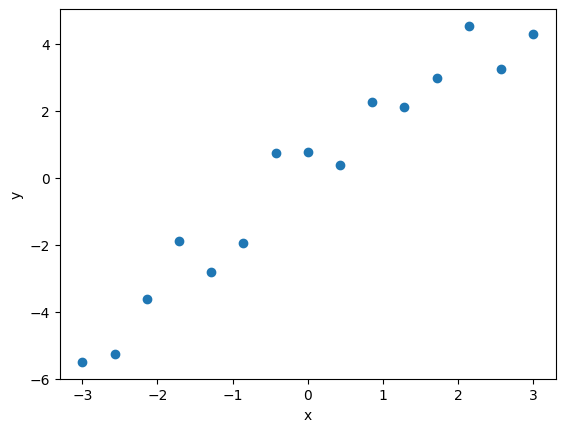

In [1]:
#Requirement 1

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Generate 15 data points with equal spacing in the interval [-3, 3]
x = np.linspace(-3, 3, num=15)

# Generate the noise samples from a zero-mean Gaussian distribution with standard deviation 1
noise = np.random.normal(loc=0, scale=1, size=15)
# Compute the corresponding y values using the linear model
y = 2 * x + noise

# Plot the data points as a scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


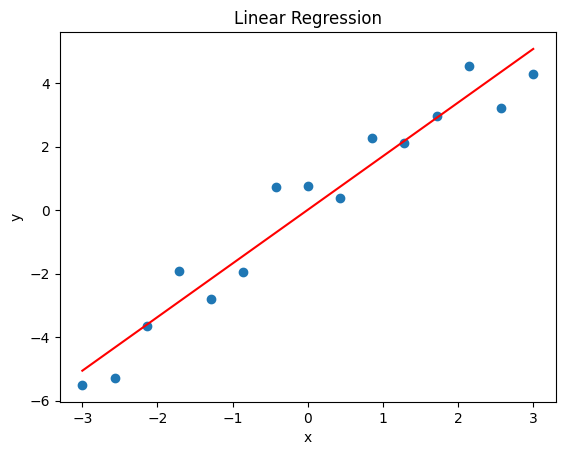

Training error: 0.5899826233860157
Cross-validation errors: [0.3800533653381555, 0.9589254301285632, 0.7188262893606258, 0.3393074612157955, 1.9638207608102423]


In [3]:
#Requirement 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Generate the data
np.random.seed(42)
x = np.linspace(-3, 3, num=15)
noise = np.random.normal(loc=0, scale=1, size=15)
y = 2 * x + noise

# Create the design matrix
X = np.column_stack((np.ones_like(x), x))

# Compute the weight vector using the normal equation
W = np.linalg.inv(X.T @ X) @ X.T @ y

# Compute the predicted values and the training error
y_pred_train = X @ W

mse_train = np.mean((y - y_pred_train)**2)

# Compute the five-fold cross-validation errors
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_cv = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    W_cv = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    y_pred_cv = X_test @ W_cv
    mse_cv.append(np.mean((y_test - y_pred_cv)**2))

# Plot the fitting line and the data
plt.scatter(x, y)
plt.plot(x, y_pred_train, color='red')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print the training error and the cross-validation errors
print('Training error:', mse_train)
print('Cross-validation errors:', mse_cv)


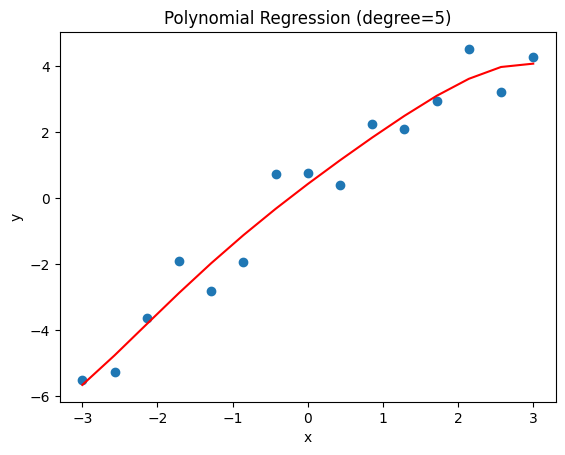

Training error (degree=5): 0.4131074093617368
Cross-validation errors (degree=5): [1.3027950844371305, 1.4754684497517088, 1.464826352207493, 0.46432560015532703, 2.3611186816936254]




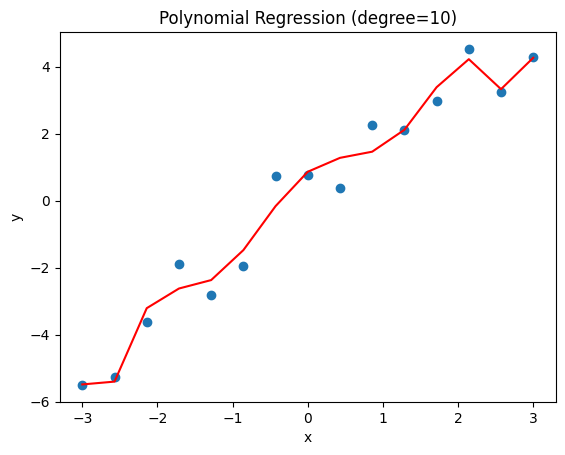

Training error (degree=10): 0.2415907284176918
Cross-validation errors (degree=10): [3592.7984800121717, 31.820851449712634, 31548.9423018607, 0.3109663883687654, 2.0309111007186798]




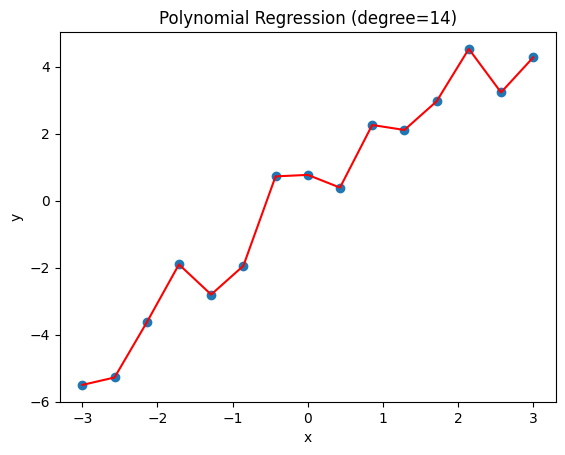

Training error (degree=14): 7.49195250613944e-12
Cross-validation errors (degree=14): [77945605.08393377, 7844.280466886881, 16110260.183059225, 1.6757993082741234, 8386.818920431358]




In [6]:
#Requirement 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Generate the data
np.random.seed(42)
x = np.linspace(-3, 3, num=15)
noise = np.random.normal(loc=0, scale=1, size=15)
y = 2 * x + noise

# Create the design matrix for polynomial regression
def create_design_matrix(x, degree):
    X = np.ones((len(x), 1))
    for i in range(1, degree+1):
        X = np.hstack((x.reshape(-1,1)**i,X))
        #print(X)
    return X

# Perform polynomial regression for degrees 5, 10, and 14
degrees = [5, 10, 14]
for degree in degrees:
    X = create_design_matrix(x, degree)

    # Compute the weight vector using the normal equation
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Compute the predicted values and the training error
    y_pred_train = X @ W
    mse_train = np.mean((y - y_pred_train)**2)

    # Compute the five-fold cross-validation errors
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_cv = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        W_cv = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        y_pred_cv = X_test @ W_cv
        mse_cv.append(np.mean((y_test - y_pred_cv)**2))

    # Plot the fitting line and the data
    plt.scatter(x, y)
    plt.plot(x, y_pred_train, color='red')
    plt.title('Polynomial Regression (degree={})'.format(degree))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Print the training error and the cross-validation errors
    print('Training error (degree={}): {}'.format(degree, mse_train))
    print('Cross-validation errors (degree={}): {}'.format(degree, mse_cv))
    print("\n")


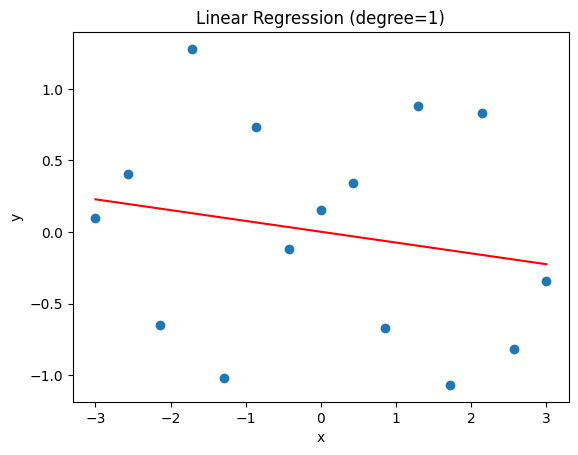

Training error (degree=1): 0.5018970543254088
Cross-validation errors (degree=1): [0.6561265733420149, 0.39592413855889436, 0.3034018243724104, 0.8492598315454186, 1.0209398531347447]




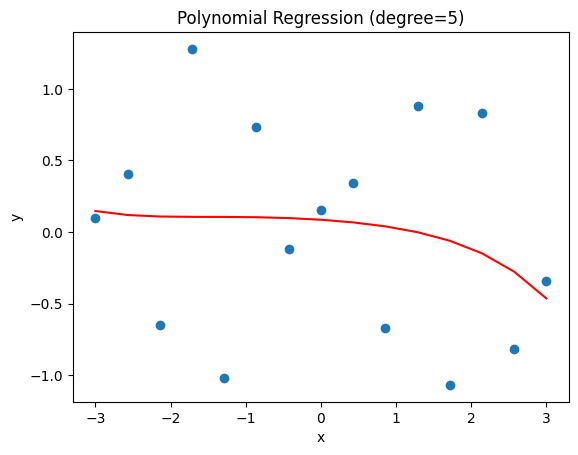

Training error (degree=5): 0.4934658473431223
Cross-validation errors (degree=5): [1.7422295715087044, 0.6430365726540999, 0.9204610195276764, 1.6498636506572852, 1.9858125983455022]




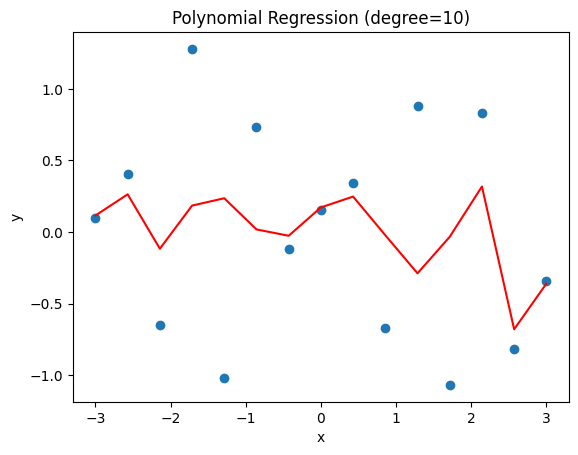

Training error (degree=10): 0.4510987165456404
Cross-validation errors (degree=10): [21781.48891730714, 399.9887523061586, 131888.3640710161, 5.166142236688748, 10.564750583238393]




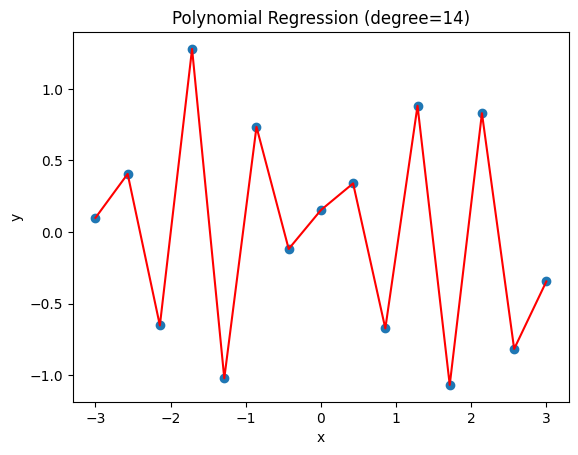

Training error (degree=14): 6.74751768848857e-13
Cross-validation errors (degree=14): [476177727.9688049, 1283.9706317194766, 21987429.04661108, 5.473284319744681, 7666.560701332703]




In [1]:
#Requirement 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Generate the data
np.random.seed(42)
x = np.linspace(-3, 3, num=15)

#y = sin(2πx) +εwith the noise ε∼ N(0, 0.04)
noise = np.random.normal(loc=0, scale=0.2, size=15)
y = np.sin(2 * np.pi * x) + noise


# Create the design matrix for polynomial regression
def create_design_matrix(x, degree):
    X = np.ones((len(x), 1))
    for i in range(1, degree+1):
        X = np.hstack((x.reshape(-1,1)**i,X))
        #print(X)
    return X

# Perform polynomial regression for degrees 5, 10, and 14
degrees = [1, 5, 10, 14]
for degree in degrees:
    X = create_design_matrix(x, degree)

    # Compute the weight vector using the normal equation
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Compute the predicted values and the training error
    y_pred_train = X @ W
    mse_train = np.mean((y - y_pred_train)**2)

    # Compute the five-fold cross-validation errors
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_cv = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        W_cv = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        y_pred_cv = X_test @ W_cv
        mse_cv.append(np.mean((y_test - y_pred_cv)**2))

    # Plot the fitting line and the data
    plt.scatter(x, y)
    plt.plot(x, y_pred_train, color='red')
    if(degree==1):
      plt.title('Linear Regression (degree={})'.format(degree))
    else:
      plt.title('Polynomial Regression (degree={})'.format(degree))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Print the training error and the cross-validation errors
    print('Training error (degree={}): {}'.format(degree, mse_train))
    print('Cross-validation errors (degree={}): {}'.format(degree, mse_cv))
    print("\n")



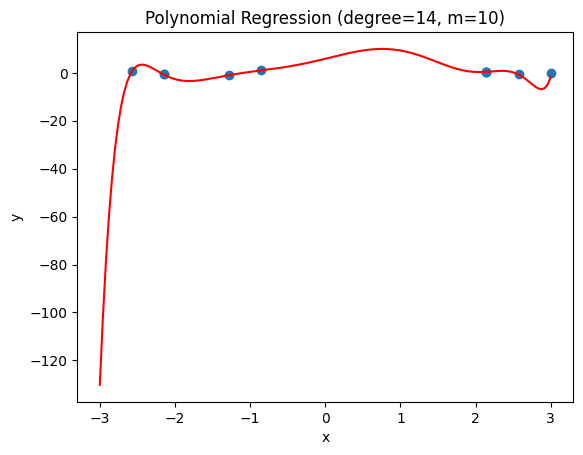

Training error (degree=14, m=10): 0.37606378525229206
Cross-validation errors (degree=14, m=10): [0.8267215866286812, 0.5679213852830475, 2.0080476982653366, 363961621.038037, 48558.91463630818]




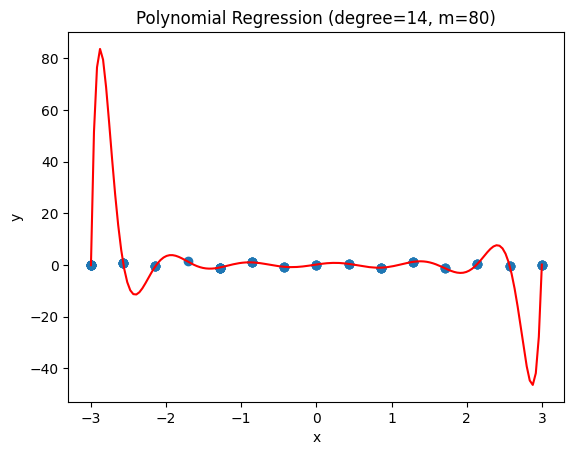

Training error (degree=14, m=80): 2.6716044696951904e-11
Cross-validation errors (degree=14, m=80): [5.4141219584534346e-11, 6.7736170788506e-11, 5.3203598231402484e-12, 1.6881588567069829e-13, 5.9060142561137905]




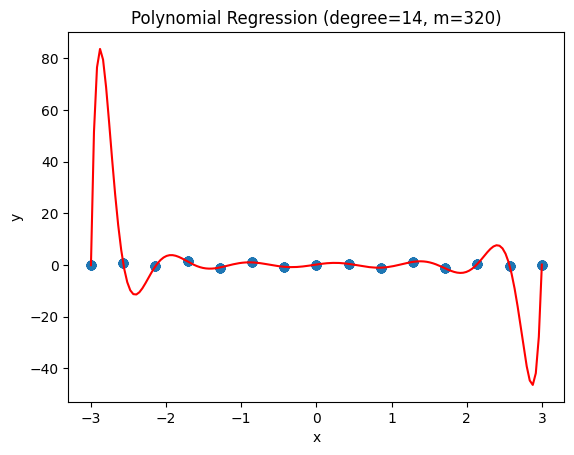

Training error (degree=14, m=320): 3.694294202738933e-11
Cross-validation errors (degree=14, m=320): [1.0306388393141348e-10, 1.0103206331839158e-10, 5.649156152878312e-11, 3.7881707752820726e-11, 1.2070245455072027e-11]




In [6]:
#Requirement 5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Define the number of training data points
m_values = [10, 80, 320]
num = 15

# Generate the data
#np.random.seed(42)
#indices = np.random.choice(100, num, replace=False)
x = np.linspace(-3, 3, num=num)
noise = np.random.normal(loc=0, scale=0.2, size=num)
y = np.sin(2 * np.pi * x) + noise

# Create the design matrix for polynomial regression
def create_design_matrix(x, degree):
    X = np.ones((len(x), 1))
    for i in range(1, degree+1):
        X = np.hstack((x.reshape(-1,1)**i,X))
    return X

# Perform polynomial regression for degree 14 and vary the number of training data points
degrees = [14]
for degree in degrees:
    for m in m_values:
        # Randomly select m training data points
        indices = np.random.choice(num, m, replace=True)
        x_train, y_train = x[indices], y[indices]
        X_train = create_design_matrix(x_train, degree)

        # Compute the weight vector using the normal equation
        W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

        # Compute the predicted values and the training error
        y_pred_train = X_train @ W
        mse_train = np.mean((y_train - y_pred_train)**2)

        # Compute the five-fold cross-validation errors
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        mse_cv = []
        for train_index, test_index in kf.split(X_train):
            X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
            y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
            W_cv = np.linalg.inv(X_train_cv.T @ X_train_cv) @ X_train_cv.T @ y_train_cv
            y_pred_cv = X_test_cv @ W_cv
            mse_cv.append(np.mean((y_test_cv - y_pred_cv)**2))

        # Plot the fitting line and the data
        plt.scatter(x_train, y_train)
        x_plot = np.linspace(-3, 3, num=num*10) #為了畫出平滑畫曲線
        X_plot = create_design_matrix(x_plot, degree)
        y_plot = X_plot @ W
        plt.plot(x_plot, y_plot, color='red')
        plt.title('Polynomial Regression (degree={}, m={})'.format(degree, m))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        # Print the training error and the cross-validation errors
        print('Training error (degree={}, m={}): {}'.format(degree, m, mse_train))
        print('Cross-validation errors (degree={}, m={}): {}'.format(degree, m, mse_cv))
        print("\n")


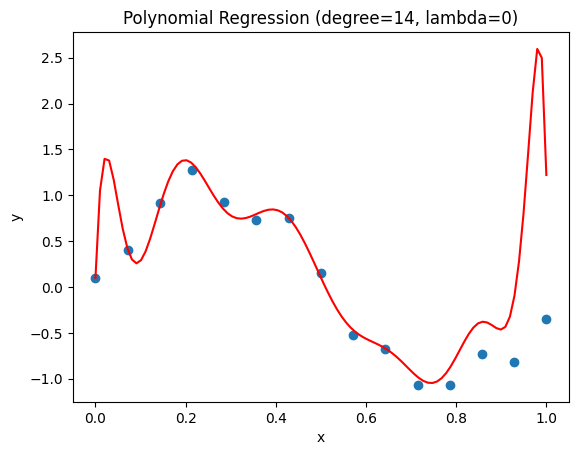

Cross-validation errors (degree=14, lambda=0): [48.31465162839259, 81.25297133025838, 35673.57605268293, 0.20034660134456603, 1.082948748821802]




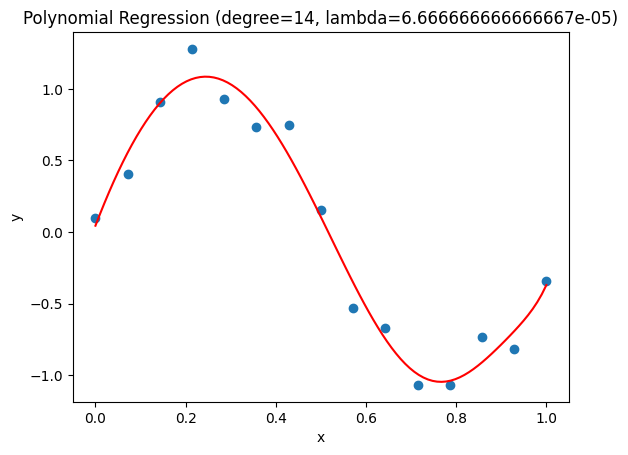

Cross-validation errors (degree=14, lambda=6.666666666666667e-05): [0.02466172140856922, 0.16977939482026985, 2.209767516593763, 0.012972387506546293, 0.10004041654933112]




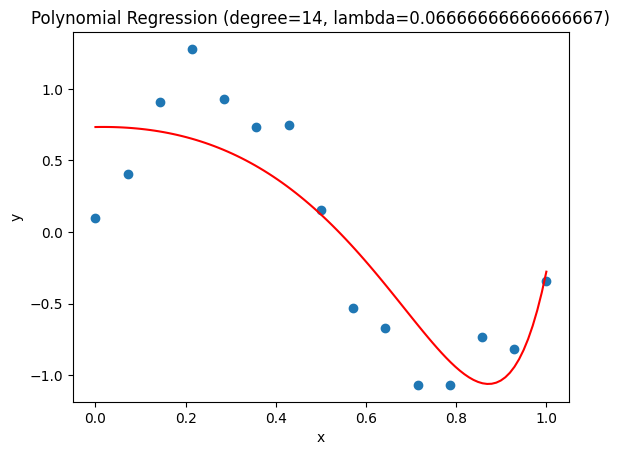

Cross-validation errors (degree=14, lambda=0.06666666666666667): [0.3414482819088513, 0.11114912316618564, 0.2045812295087921, 0.1376413793372324, 0.37360611711014907]




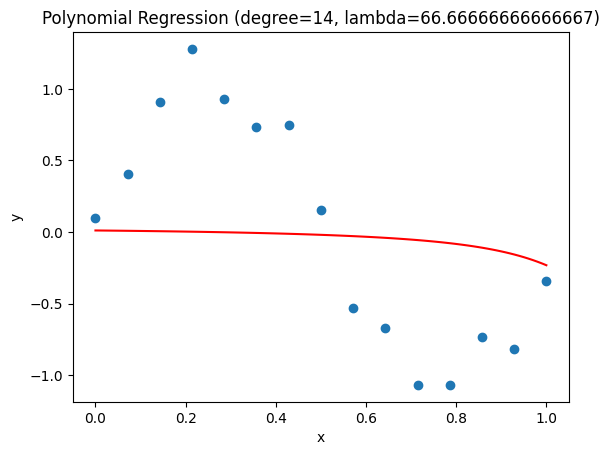

Cross-validation errors (degree=14, lambda=66.66666666666667): [0.505181504392254, 0.43368926302853367, 0.34456439000434186, 0.6436076934214195, 0.8905367072871458]




In [7]:
#Requirement 6 # 使用正則化可以幫助減少模型的過度擬合 (overfitting) 問題
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Define the number of training data points
m = 15

# Generate the data
np.random.seed(42)
x = np.linspace(0, 1, num=m)
noise = np.random.normal(loc=0, scale=0.2, size=m)
y = np.sin(2 * np.pi * x) + noise

# Create the design matrix for polynomial regression
def create_design_matrix(x, degree):
    X = np.ones((len(x), 1))
    for i in range(1, degree+1):
        X = np.hstack((x.reshape(-1,1)**i,X))
    return X

# Define the degrees and regularization parameters
degrees = [14]
lambdas = [0, 0.001/m, 1/m, 1000/m]

# Loop over the degrees and regularization parameters
for degree in degrees:
    for lambda_val in lambdas:
        # Create the design matrix
        X = create_design_matrix(x, degree)

        # Compute the weight vector using "ridge regression" 
        W = np.linalg.inv(X.T @ X + lambda_val * np.identity(degree+1)) @ X.T @ y

        # Compute the five-fold cross-validation errors
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        mse_cv = []
        for train_index, test_index in kf.split(X):
            X_train_cv, X_test_cv = X[train_index], X[test_index]
            y_train_cv, y_test_cv = y[train_index], y[test_index]
            W_cv = np.linalg.inv(X_train_cv.T @ X_train_cv + lambda_val * np.identity(degree+1)) @ X_train_cv.T @ y_train_cv
            y_pred_cv = X_test_cv @ W_cv
            mse_cv.append(np.mean((y_test_cv - y_pred_cv)**2))

        # Plot the fitting line and the data
        plt.scatter(x, y)
        x_plot = np.linspace(0, 1, num=100)
        X_plot = create_design_matrix(x_plot, degree)
        y_plot = X_plot @ W
        plt.plot(x_plot, y_plot, color='red')
        plt.title('Polynomial Regression (degree={}, lambda={})'.format(degree, lambda_val))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        # Print the cross-validation errors
        print('Cross-validation errors (degree={}, lambda={}): {}'.format(degree, lambda_val, mse_cv))
        print("\n")
